# COVID-19 in Canada: A Data Visualization Journey through Cases, Deaths, and Provincial Comparisons

## I. Introduction and Objectives
### 1. Overview

In this project, we explore the **`COVID-19` pandemic's impact across Canadian provinces** by analyzing case **trends**, **`death rates`**, and normalized data to highlight regional disparities. This project offers a comprehensive view of the pandemic's course in **`Canada`**, from case surges to mortality trends.

### 2. Objectives

**1. Analyze **`COVID-19`** case **trends** across Canadian provinces.**

**2. Compare **`death rates`** and **trends** by **`province`**.**

**3. Normalize data for fair comparisons (e.g., **`cases`** and **`deaths`** per capita).**

**4. Explore key insights, including **pandemic peaks** and **regional disparities**.**

## II. Data Cleaning and Preprocessing

### 1. Loading and Inspecting Data

In [3]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing seaborn library for data visualization and creating attractive and informative statistical graphics
import seaborn as sns

# Importing matplotlib.pyplot for creating static, interactive, and animated visualizations in Python
import matplotlib.pyplot as plt

# Importing matplotlib.dates to work with date formatting and manipulation in visualizations
import matplotlib.dates as mdates

Let's **load** the data and begin by inspecting it.

In [4]:
# Load the data
data = pd.read_csv('../Data/canada_covid19.csv')

# Display the first few rows
data.head()

,prname,date,reporting_week,totalcases,ratecases_total,numdeaths,ratedeaths
0,British Columbia,2020-02-01,5,1,0.02,0,0.0
1,Alberta,2020-02-01,5,0,0.00,0,0.0
2,Saskatchewan,2020-02-01,5,0,0.00,0,0.0
3,Manitoba,2020-02-01,5,0,0.00,0,0.0
4,Ontario,2020-02-01,5,3,0.02,0,0.0


In [5]:
# Displaying a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prname           3180 non-null   object 
 1   date             3180 non-null   object 
 2   reporting_week   3180 non-null   int64  
 3   totalcases       3180 non-null   int64  
 4   ratecases_total  2968 non-null   float64
 5   numdeaths        3180 non-null   int64  
 6   ratedeaths       2968 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 174.0+ KB


### 2. Date Parsing

**Convert** the **`date`** column to a **`datetime`** format to enable easy time-based analysis. 

In [6]:
# Convert the 'date' column to datetime format
data["date"] = pd.to_datetime(data["date"], errors='coerce')

Extract the **`year`**, **`month`**, and **`day`** from the **`date`** column to create separate columns for simplified time-based analysis.

In [7]:
# Create a 'year' column
data["year"] = data["date"].dt.year

# Create month column
data['month'] = data["date"].dt.month

# Create day column
data['day'] = data["date"].dt.day

In [8]:
# Verify the conversion
data.dtypes

prname                     object
date               datetime64[ns]
reporting_week              int64
totalcases                  int64
ratecases_total           float64
numdeaths                   int64
ratedeaths                float64
year                        int32
month                       int32
day                         int32
dtype: object

### 3. Handling Missing Values

Check for **missing values** in the dataset to ensure data completeness and reliability before proceeding with analysis.

In [9]:
# Check for missing values

missing_values = data.isna().sum()
missing_values

prname               0
date                 0
reporting_week       0
totalcases           0
ratecases_total    212
numdeaths            0
ratedeaths         212
year                 0
month                0
day                  0
dtype: int64

In [10]:
# Filtering the DataFrame to include only rows where both 'ratecases_total' and 'ratedeaths' columns have NaN (missing) values
data_nan = data[(data["ratecases_total"].isna()) & (data["ratedeaths"].isna())]

# Displaying the filtered DataFrame that contains rows with missing values in both 'ratecases_total' and 'ratedeaths' columns
data_nan

,prname,date,reporting_week,totalcases,ratecases_total,numdeaths,ratedeaths,year,month,day
13,Repatriated travellers,2020-02-01,5,0,NaN,0,NaN,2020,2,1
28,Repatriated travellers,2020-02-08,6,0,NaN,0,NaN,2020,2,8
43,Repatriated travellers,2020-02-15,7,0,NaN,0,NaN,2020,2,15
58,Repatriated travellers,2020-02-22,8,0,NaN,0,NaN,2020,2,22
73,Repatriated travellers,2020-02-29,9,0,NaN,0,NaN,2020,2,29
...,...,...,...,...,...,...,...,...,...,...
3118,Repatriated travellers,2024-01-20,3,13,NaN,0,NaN,2024,1,20
3133,Repatriated travellers,2024-01-27,4,13,NaN,0,NaN,2024,1,27
3148,Repatriated travellers,2024-02-03,5,13,NaN,0,NaN,2024,2,3
3163,Repatriated travellers,2024-02-10,6,13,NaN,0,NaN,2024,2,10


The filtered rows indicate that for the category **`Repatriated travellers`**, the columns **`ratecases_total`** and **`ratedeaths`** contain missing values (**NaN**). The data spans from **`2020-02-01`** to **`2024-02-17`**.

In [11]:
# Printing the number of rows in the filtered dataset containing missing values and their percentage in the original dataset
print(f"The dataset contains {data_nan.shape[0]} missing values, which is {(data_nan.shape[0] / data.shape[0]) * 100:.2f} % of the total rows.")

The dataset contains 212 missing values, which is 6.67 % of the total rows.


In [12]:
# Filtering the original dataset to exclude rows where the 'prname' column equals "Repatriated travellers"
data_covid = data[data["prname"] != "Repatriated travellers"].copy()

# Displaying the filtered DataFrame to confirm that rows with 'prname' equal to "Repatriated travellers" have been removed
data_covid

,prname,date,reporting_week,totalcases,ratecases_total,numdeaths,ratedeaths,year,month,day
0,British Columbia,2020-02-01,5,1,0.02,0,0.00,2020,2,1
1,Alberta,2020-02-01,5,0,0.00,0,0.00,2020,2,1
2,Saskatchewan,2020-02-01,5,0,0.00,0,0.00,2020,2,1
3,Manitoba,2020-02-01,5,0,0.00,0,0.00,2020,2,1
4,Ontario,2020-02-01,5,3,0.02,0,0.00,2020,2,1
...,...,...,...,...,...,...,...,...,...,...
3174,Prince Edward Island,2024-02-17,7,58417,34224.43,119,69.72,2024,2,17
3175,Yukon,2024-02-17,7,4989,11393.27,32,73.08,2024,2,17
3176,Northwest Territories,2024-02-17,7,11511,25240.65,22,48.24,2024,2,17
3177,Nunavut,2024-02-17,7,3531,8712.93,7,17.27,2024,2,17


In [13]:
# Check for missing values

missing_values = data_covid[['ratecases_total','ratedeaths']].isna().sum()
missing_values

ratecases_total    0
ratedeaths         0
dtype: int64

### 4. Feature Engineering

Let's calculate Case **`Fatality Rate (CFR)`** and the **`Weekly New Cases`** and **`Deaths`**.

In [14]:
# Calculate Case Fatality Rate (CFR)
data_covid['case_fatality_rate'] = (data_covid['numdeaths'] / data_covid['totalcases']) * 100

# Calculate Weekly New Cases and Deaths
data_covid['weekly_new_cases'] = data_covid['totalcases'].diff(periods=7)
data_covid['weekly_new_deaths'] = data_covid['numdeaths'].diff(periods=7)

In [15]:
# Dropping all rows in the 'data_covid' DataFrame that contain any missing (NaN) values
data_covid = data_covid.dropna()

# Check for missing values
data_covid.isna().sum()

prname                0
date                  0
reporting_week        0
totalcases            0
ratecases_total       0
numdeaths             0
ratedeaths            0
year                  0
month                 0
day                   0
case_fatality_rate    0
weekly_new_cases      0
weekly_new_deaths     0
dtype: int64

In [16]:
# Renaming the column 'prname' to 'province' for better readability and consistency
data_covid = data_covid.rename(columns={'prname': 'province'})

# Selecting specific columns to retain in the 'data_covid' DataFrame
# This helps focus on the most relevant variables for analysis
data_covid = data_covid[['province', 'date', 'year', 'month', 'day', 'reporting_week', 
                         'totalcases', 'ratecases_total', 'weekly_new_cases', 
                         'numdeaths', 'ratedeaths', 'case_fatality_rate', 'weekly_new_deaths']]

# Displaying the first few rows of the updated 'data_covid' DataFrame to ensure the changes were applied correctly
data_covid.head()

,province,date,year,month,day,reporting_week,totalcases,ratecases_total,weekly_new_cases,numdeaths,ratedeaths,case_fatality_rate,weekly_new_deaths
14,Canada,2020-02-01,2020,2,1,5,4,0.01,4.0,0,0.0,0.0,0.0
15,British Columbia,2020-02-08,2020,2,8,6,4,0.08,4.0,0,0.0,0.0,0.0
19,Ontario,2020-02-08,2020,2,8,6,4,0.03,4.0,0,0.0,0.0,0.0
29,Canada,2020-02-08,2020,2,8,6,8,0.02,8.0,0,0.0,0.0,0.0
30,British Columbia,2020-02-15,2020,2,15,7,4,0.08,4.0,0,0.0,0.0,0.0


## III. Exploratory Analysis and Visualizations
### 1. COVID-19 Cases Trends
### 1.1 COVID-19 Total Cases Across Canada

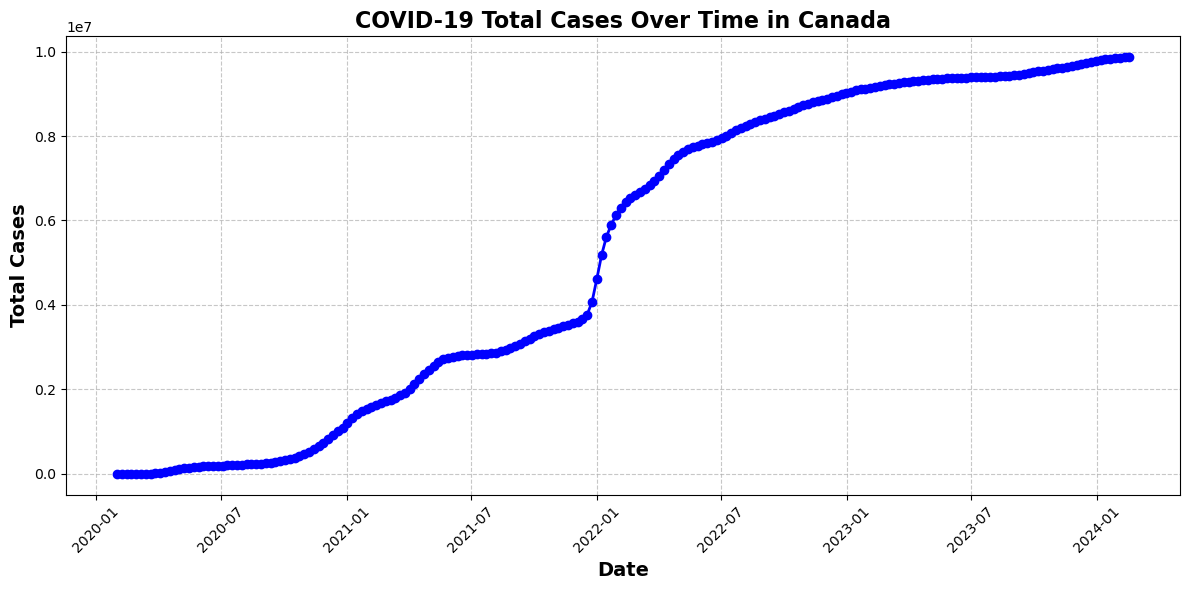

In [17]:
# Group by date and sum total cases across provinces
cases_over_time = data_covid.groupby('date')['totalcases'].sum()

# Plot the line plot
plt.figure(figsize=(12, 6))
plt.plot(cases_over_time.index, cases_over_time.values, marker='o', linestyle='-', linewidth=2, color='blue')
plt.title("COVID-19 Total Cases Over Time in Canada", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontweight='bold', fontsize=14)
plt.ylabel("Total Cases", fontweight='bold', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### 1.2 COVID-19 Total Cases by Province

In [18]:
# Grouping the 'data_covid' DataFrame by the 'province' column and calculating the total sum of 'totalcases' for each province
data_cases_provinces = data_covid.groupby('province')['totalcases'].sum(numeric_only=True)

# Displaying the resulting Series, which shows the total number of cases for each province
data_cases_provinces

province
Alberta                       80504411
British Columbia              51249691
Canada                       559503532
Manitoba                      19485185
New Brunswick                  8912651
Newfoundland and Labrador      5629703
Northwest Territories          1256158
Nova Scotia                   13941547
Nunavut                         407810
Ontario                      193613876
Prince Edward Island           5385603
Quebec                       159348011
Saskatchewan                  19218685
Yukon                           547530
Name: totalcases, dtype: int64

In [19]:
# Removing the row where the index (province) is 'Canada' from the 'data_cases_provinces' Series
data_cases_provinces = data_cases_provinces[data_cases_provinces.index != 'Canada']

# Sorting the values in the 'data_cases_provinces' Series in descending order
# This ensures that provinces with the highest total cases appear at the top
data_cases_provinces = data_cases_provinces.sort_values(ascending=False)

# Displaying the updated 'data_cases_provinces' Series to confirm the filtering and sorting
data_cases_provinces

province
Ontario                      193613876
Quebec                       159348011
Alberta                       80504411
British Columbia              51249691
Manitoba                      19485185
Saskatchewan                  19218685
Nova Scotia                   13941547
New Brunswick                  8912651
Newfoundland and Labrador      5629703
Prince Edward Island           5385603
Northwest Territories          1256158
Yukon                           547530
Nunavut                         407810
Name: totalcases, dtype: int64

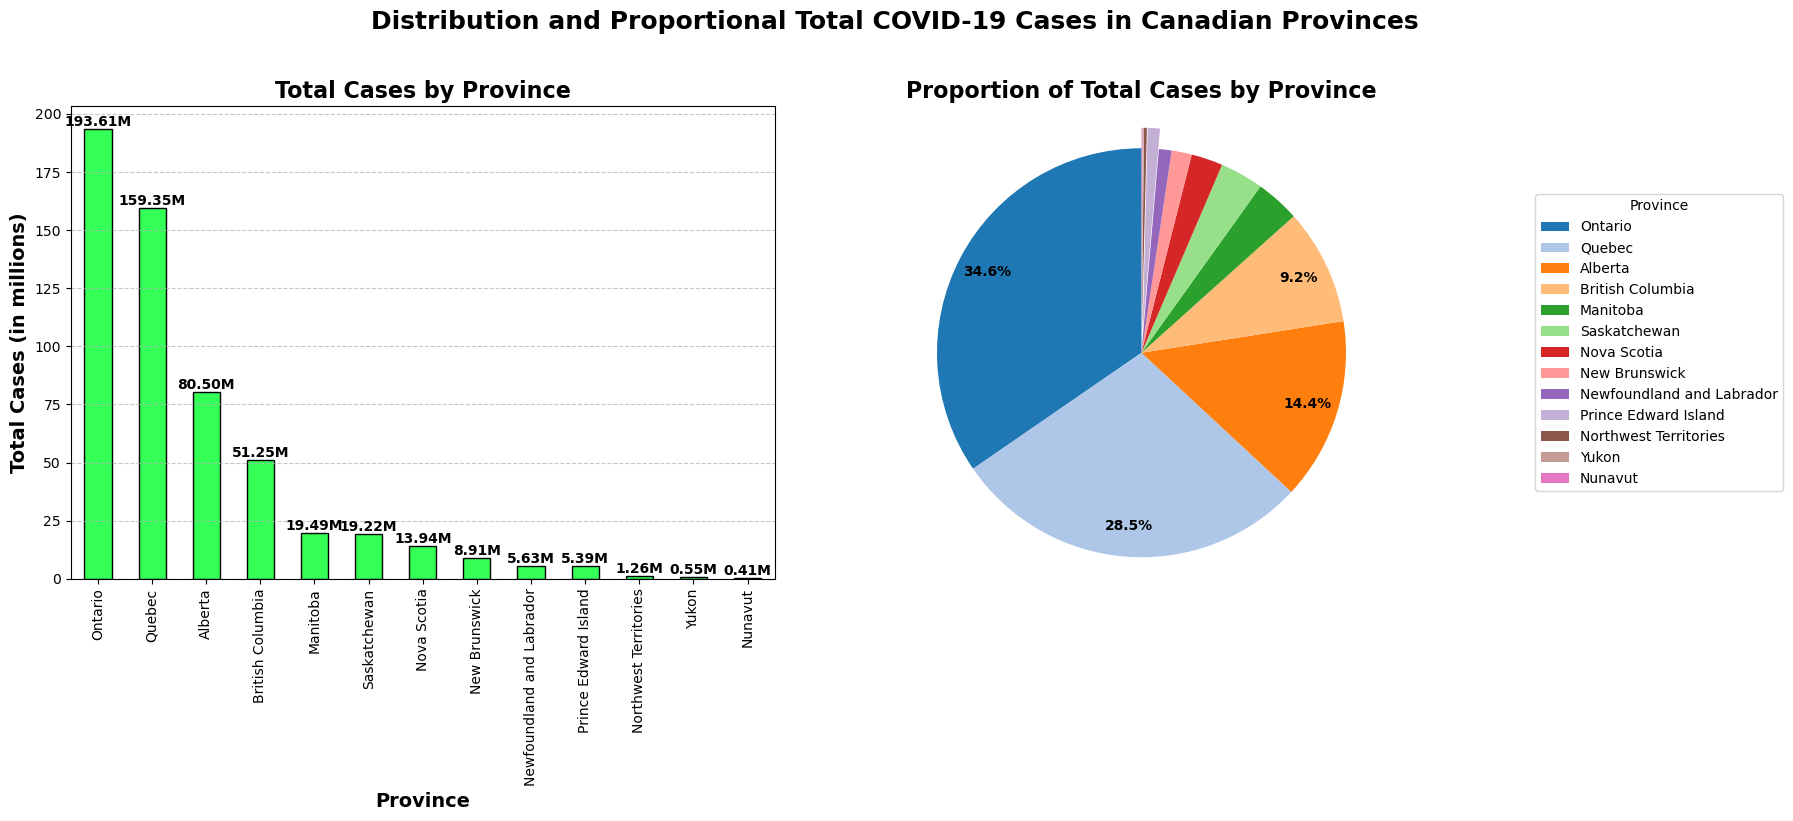

In [20]:
# Scale the data for better visualization
data_cases_provinces_scaled = data_cases_provinces / 1_000_000  # Scale to millions

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Set up the global title for the figure
fig.suptitle(
    "Distribution and Proportional Total COVID-19 Cases in Canadian Provinces",
    fontsize=18,
    fontweight='bold',
    y=1.02  # Adjust vertical position of the title
)

# Bar plot on the left
data_cases_provinces_scaled.plot(kind='bar', ax=axes[0], color='#33FF57', edgecolor='black')
axes[0].set_title("Total Cases by Province", fontweight='bold', fontsize=16)
axes[0].set_xlabel("Province", fontweight='bold', fontsize=14)
axes[0].set_ylabel("Total Cases (in millions)", fontweight='bold', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add bold bar values (scaled)
for index, value in enumerate(data_cases_provinces_scaled.values):
    axes[0].text(
        index, value, f'{value:.2f}M',  # Show values in millions with 2 decimal places
        ha='center', va='bottom', fontweight='bold', fontsize=10
    )

# Pie chart on the right with adjusted percentage labels
colors = plt.cm.tab20.colors  # Use a color map for better color palette

# Function to adjust the autopct format and make labels bold
def format_autopct(pct):
    if pct > 5:  # Show percentage only if it's greater than 5%
        return f'{pct:.1f}%'
    else:
        return ''  # Hide smaller percentages to declutter

# Add bold text formatting for percentages
def bold_autopct(pct):
    value = format_autopct(pct)
    return f'**{value}**' if value else ''  # Apply bold formatting

data_cases_provinces.plot(
    kind='pie',
    ax=axes[1],
    autopct=lambda pct: f'{format_autopct(pct)}',  # Format percentages with bold
    startangle=90,
    colors=colors,
    explode=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1],  # Explode certain slices
    legend=False,  
    pctdistance=0.85,  # Adjust distance of percentage labels from the center
    labels=None,       # Remove province names around the pie
    textprops={'fontweight': 'bold'}  # Set text to bold
)
axes[1].set_title("Proportion of Total Cases by Province", fontweight='bold', fontsize=16)
axes[1].set_ylabel("")  # Remove default y-axis label
axes[1].axis('equal')  # Ensures the pie chart is a circle

# Add legend to the right side
axes[1].legend(
    labels=data_cases_provinces.index,
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    title="Province",
    fontsize=10
)

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

### 1.3 COVID-19 total cases over time by province

In [21]:
# Grouping the 'data_covid' DataFrame by both 'province' and 'date', then calculating the total sum of 'totalcases' for each combination
grouped_data = data_covid.groupby(['province', 'date'])['totalcases'].sum().reset_index()

# Filtering out rows where the 'province' is 'Canada', as it represents aggregated data for the entire country
grouped_data = grouped_data[grouped_data['province'] != 'Canada']

# Displaying a random sample of 5 rows from the 'grouped_data' DataFrame to inspect the data
grouped_data.sample(5)

,province,date,totalcases
944,New Brunswick,2022-04-09,55812
1788,Nunavut,2023-05-06,3531
1192,Newfoundland and Labrador,2023-02-04,54533
2090,Prince Edward Island,2021-02-20,115
877,New Brunswick,2020-12-26,590


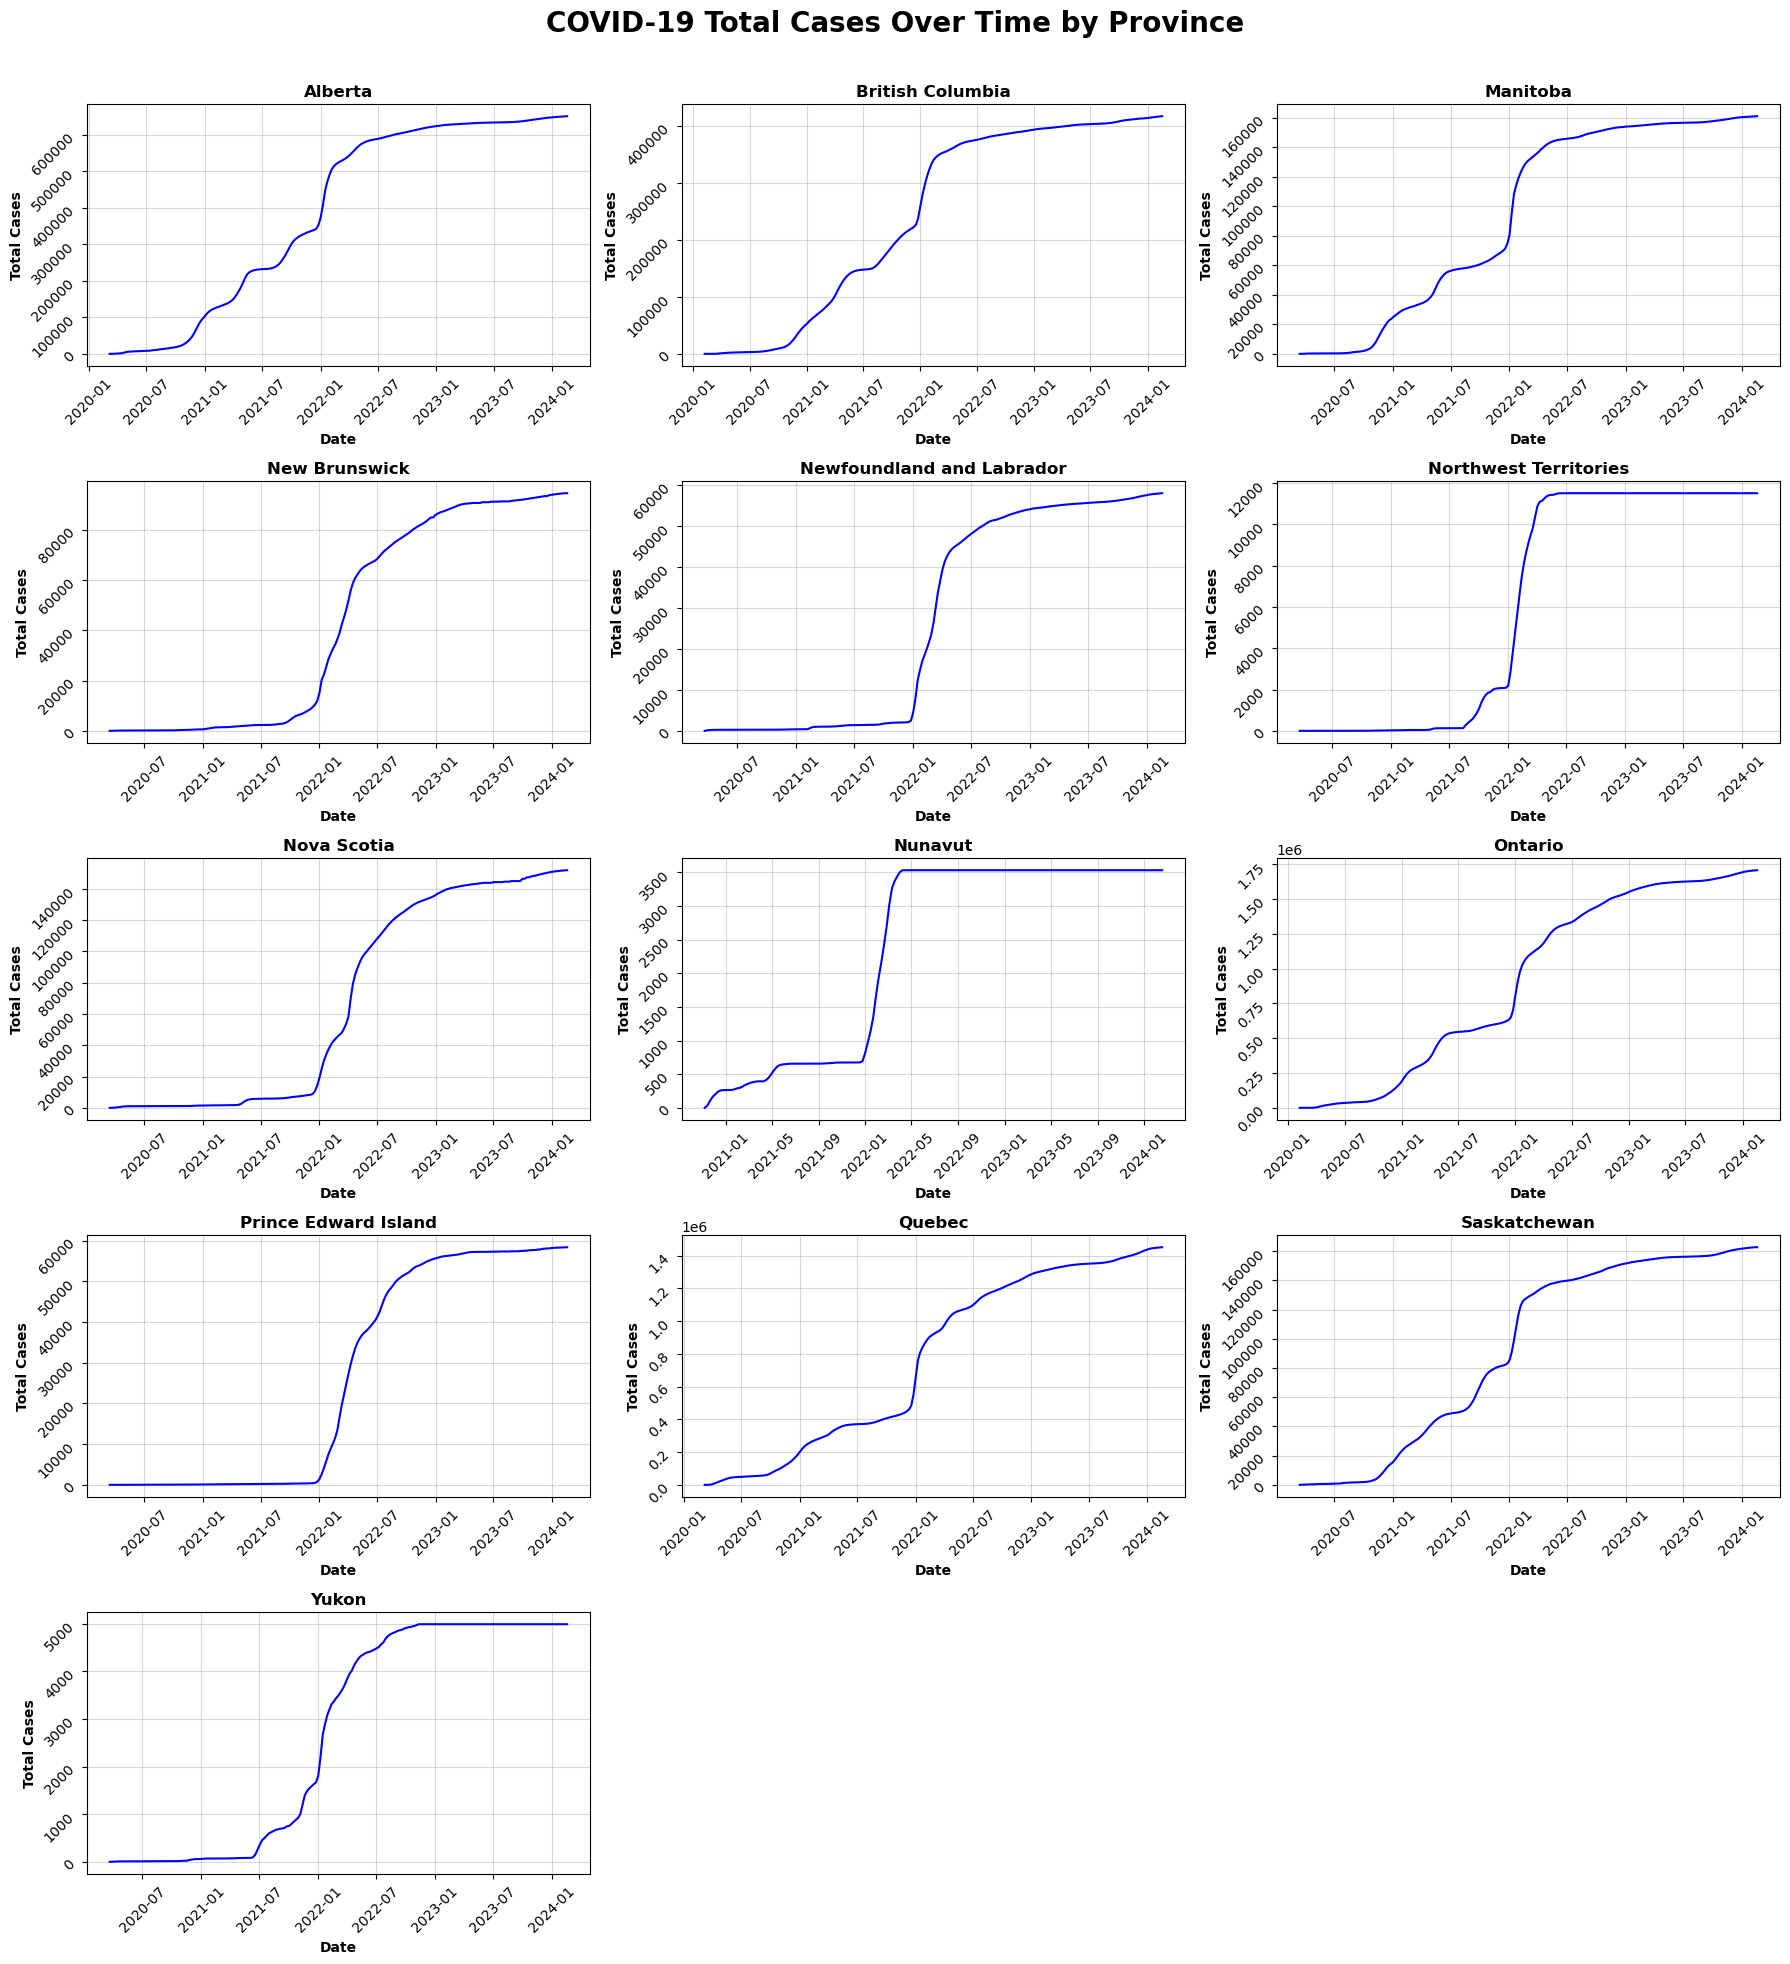

In [22]:
# Extract unique provinces from the dataset
provinces = grouped_data['province'].unique()

# Define the number of provinces and the grid dimensions
num_provinces = len(provinces)
grid_rows = (num_provinces // 3) + (num_provinces % 3 > 0)
grid_cols = 3

fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(18, grid_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot data for each province in its subplot
for i, province in enumerate(provinces):
    province_data = grouped_data[grouped_data['province'] == province]
    axes[i].plot(province_data['date'], province_data['totalcases'], color='blue')
    axes[i].set_title(province, fontsize=12, fontweight = 'bold')
    axes[i].set_xlabel('Date', fontsize=10, fontweight = 'bold')
    axes[i].set_ylabel('Total Cases', fontsize=10, fontweight = 'bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=45)
    axes[i].grid(alpha=0.5)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and move the main title above the grid
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title above the grid
fig.suptitle('COVID-19 Total Cases Over Time by Province', fontsize=20, y=0.98, fontweight = 'bold')

plt.show()

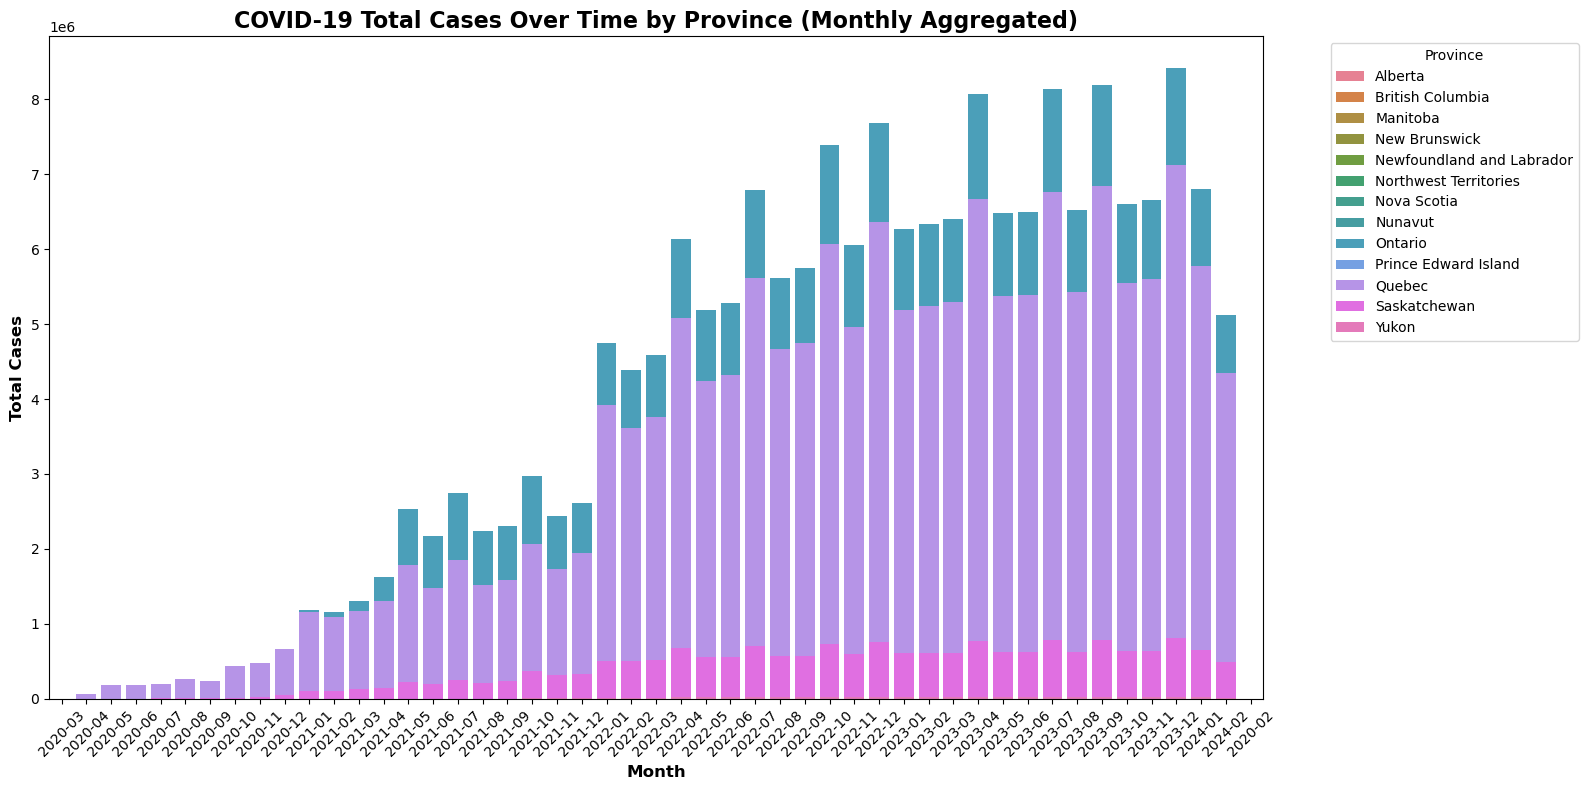

In [23]:
# Group the data by province and date for meaningful aggregation
grouped_for_bar = grouped_data.groupby(['province', 'date'])['totalcases'].sum().reset_index()

# Aggregate data by month to reduce x-axis crowding
grouped_for_bar['month'] = grouped_for_bar['date'].dt.to_period('M')
monthly_data = grouped_for_bar.groupby(['province', 'month'])['totalcases'].sum().reset_index()

# Create the bar plot with less crowded x-axis
plt.figure(figsize=(16, 8))
sns.barplot(data=monthly_data, x='month', y='totalcases', hue='province', dodge=False)
plt.title("COVID-19 Total Cases Over Time by Province (Monthly Aggregated)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12, fontweight='bold')
plt.ylabel("Total Cases", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 1.4 COVID-19 cumulative total cases over time by province

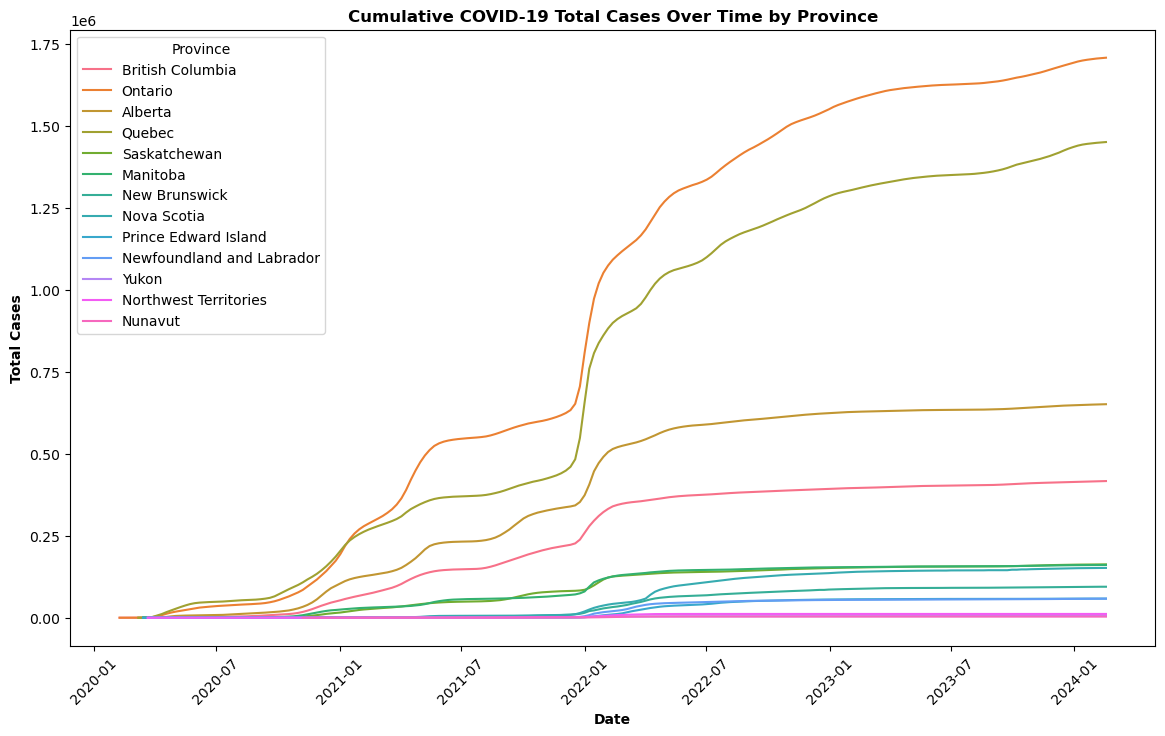

In [24]:
# Filtering the 'data_covid' DataFrame to exclude rows where the 'province' column is equal to 'Canada'
data_covid = data_covid[data_covid['province'] != 'Canada']

# Line plot for cumulative total cases over time by province
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_covid, x='date', y='totalcases', hue='province')
plt.title("Cumulative COVID-19 Total Cases Over Time by Province", fontsize=12, fontweight='bold')
plt.xlabel("Date", fontweight='bold')
plt.ylabel("Total Cases", fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Province')
plt.show()

### 2. COVID-19 Death Trends

### 2.1 COVID-19 Total Death Across Canada

In [25]:
# Group by date and sum total deaths across provinces
deaths_over_time = data_covid.groupby('date')['numdeaths'].sum()

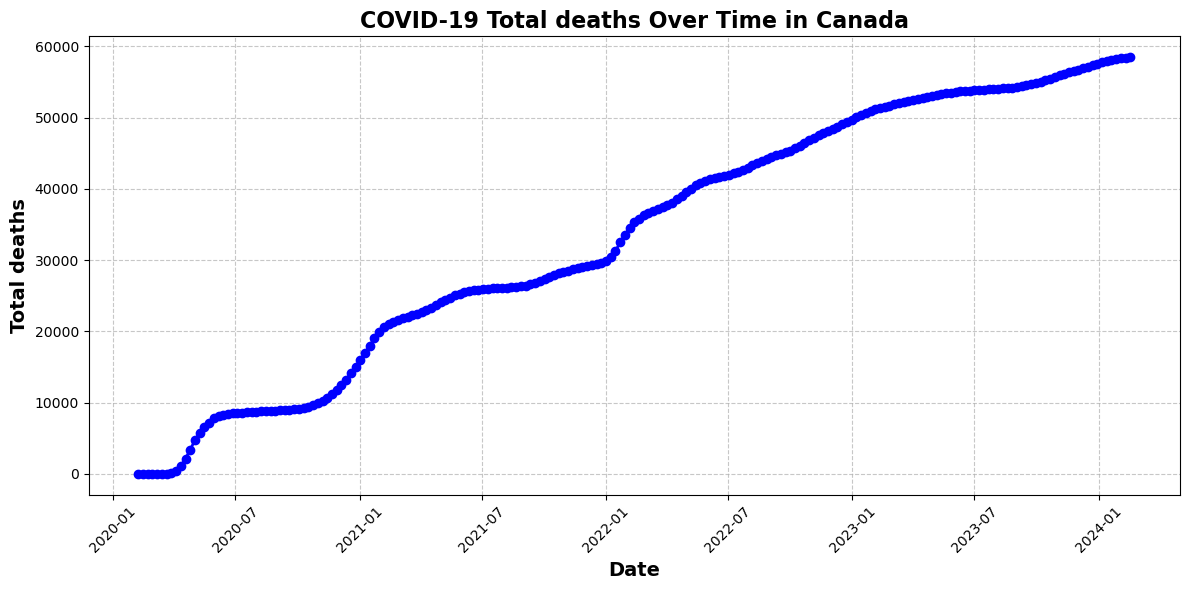

In [26]:
# Plot the line plot
plt.figure(figsize=(12, 6))
plt.plot(deaths_over_time.index, deaths_over_time.values, marker='o', linestyle='-', linewidth=2, color='blue')
plt.title("COVID-19 Total deaths Over Time in Canada", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontweight='bold', fontsize=14)
plt.ylabel("Total deaths", fontweight='bold', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### 2.2 COVID-19 Total Death by Province

In [27]:
# Grouping the 'data_covid' DataFrame by the 'province' column and calculating the total sum of 'numdeaths' for each province
data_deaths_provinces = data_covid.groupby('province')['numdeaths'].sum(numeric_only=True)

# Sorting the values in the 'data_deaths_provinces' Series in descending order
# This ensures provinces with the highest total number of deaths are listed first
data_deaths_provinces = data_deaths_provinces.sort_values(ascending=False)

# Displaying the sorted 'data_deaths_provinces' Series to show total deaths per province
data_deaths_provinces

province
Quebec                       2616324
Ontario                      2317048
Alberta                       721071
British Columbia              641500
Manitoba                      311736
Saskatchewan                  222547
New Brunswick                  80061
Nova Scotia                    79929
Newfoundland and Labrador      30944
Prince Edward Island            8439
Yukon                           3571
Northwest Territories           2531
Nunavut                          933
Name: numdeaths, dtype: int64

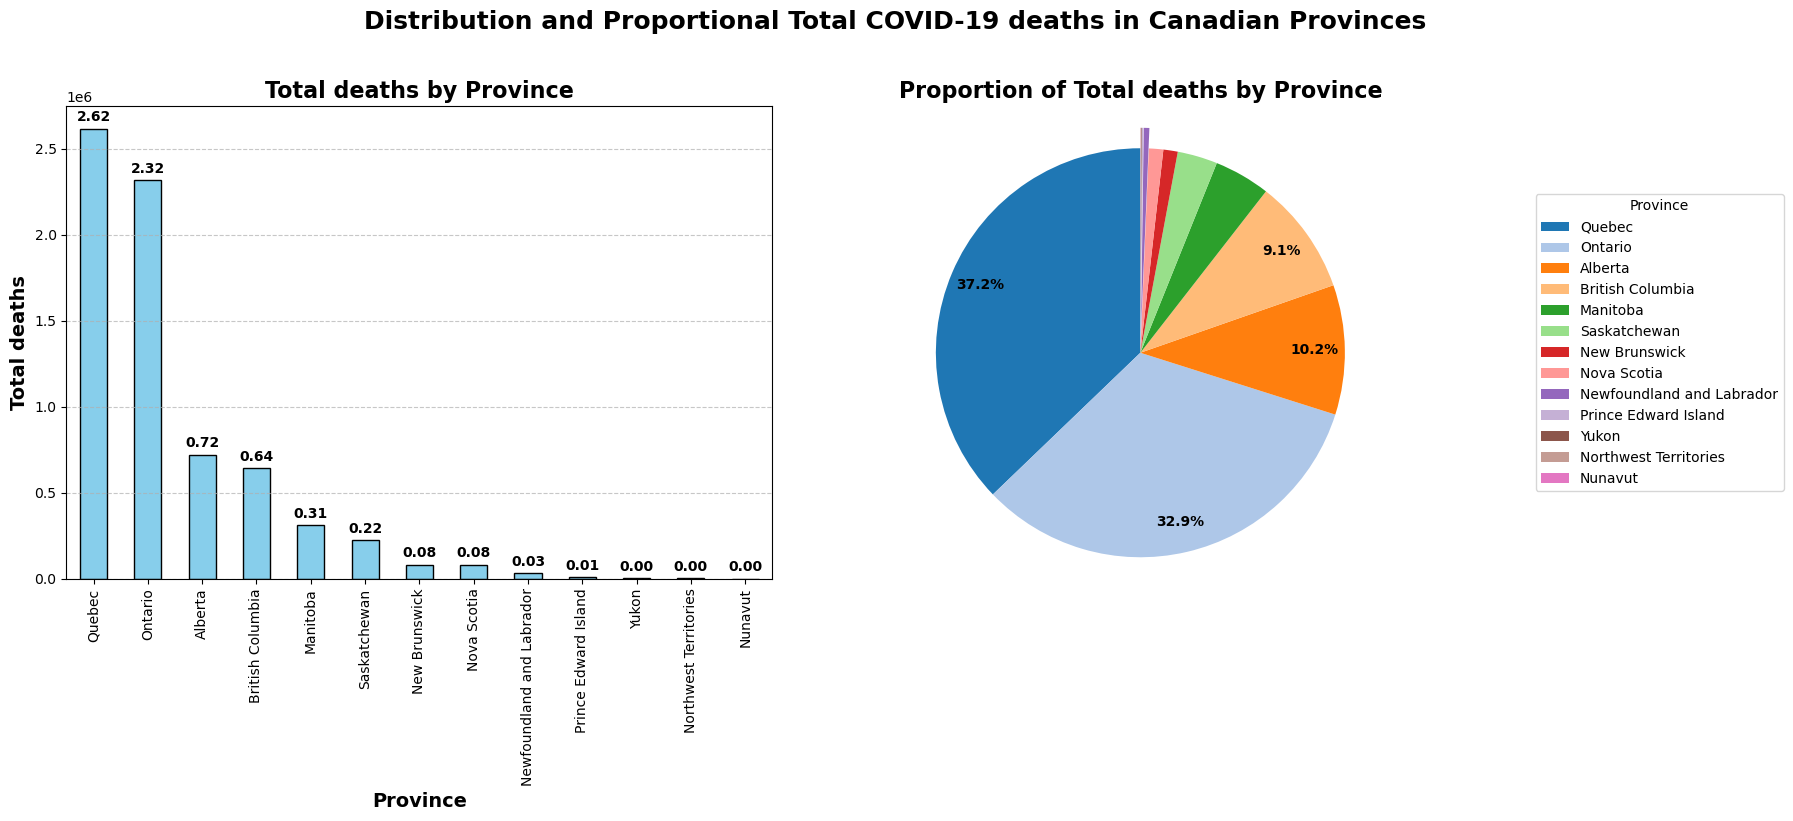

In [28]:
# Scale the data for better visualization
data_cases_provinces_scaled = data_deaths_provinces / 1_000_000  # Scale to millions

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Set up the global title for the figure
fig.suptitle(
    "Distribution and Proportional Total COVID-19 deaths in Canadian Provinces",
    fontsize=18,
    fontweight='bold',
    y=1.02  # Adjust vertical position of the title
)

# Bar plot on the left
data_deaths_provinces.plot(kind='bar', ax=axes[0], color='#87CEEB', edgecolor='black')
axes[0].set_title("Total deaths by Province", fontweight='bold', fontsize=16)
axes[0].set_xlabel("Province", fontweight='bold', fontsize=14)
axes[0].set_ylabel("Total deaths", fontweight='bold', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add bold bar values (scaled)
for index, value in enumerate(data_deaths_provinces.values):
    axes[0].text(
        index, 
        value + (0.01 * max(data_deaths_provinces.values)),  # Dynamically adjust offset
        f'{value / 1_000_000:.2f}',  # Convert to millions with 2 decimal places
        ha='center', 
        va='bottom', 
        fontweight='bold', 
        fontsize=10
    )

# Pie chart on the right with adjusted percentage labels
colors = plt.cm.tab20.colors  # Use a color map for better color palette

# Function to adjust the autopct format and make labels bold
def format_autopct(pct):
    if pct > 5:  # Show percentage only if it's greater than 5%
        return f'{pct:.1f}%'
    else:
        return ''  # Hide smaller percentages to declutter

# Add bold text formatting for percentages
data_deaths_provinces.plot(
    kind='pie',
    ax=axes[1],
    autopct=lambda pct: f'{format_autopct(pct)}',  # Format percentages with bold
    startangle=90,
    colors=colors,
    explode=[0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1, 0.1],  # Explode certain slices
    legend=False,  
    pctdistance=0.85,  # Adjust distance of percentage labels from the center
    labels=None,       # Remove province names around the pie
    textprops={'fontweight': 'bold'}  # Set text to bold
)
axes[1].set_title("Proportion of Total deaths by Province", fontweight='bold', fontsize=16)
axes[1].set_ylabel("")  # Remove default y-axis label
axes[1].axis('equal')  # Ensures the pie chart is a circle

# Add legend to the right side
axes[1].legend(
    labels=data_deaths_provinces.index,
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    title="Province",
    fontsize=10
)

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

### 2.3 COVID-19 total Death over time by province

In [29]:
# Grouping the 'data_covid' DataFrame by both 'province' and 'date', then calculating the total sum of 'numdeaths' for each combination
grouped_data = data_covid.groupby(['province', 'date'])['numdeaths'].sum().reset_index()

# Filtering out rows where the 'province' is 'Canada', as it represents aggregated data for the entire country
grouped_data = grouped_data[grouped_data['province'] != 'Canada']

# Displaying a random sample of 5 rows from the 'grouped_data' DataFrame to inspect the data
grouped_data.sample(5)

,province,date,numdeaths
1008,Newfoundland and Labrador,2023-08-19,360
58,Alberta,2021-04-17,2037
1373,Nova Scotia,2022-10-01,544
1689,Ontario,2021-06-19,9265
2486,Yukon,2020-12-12,1


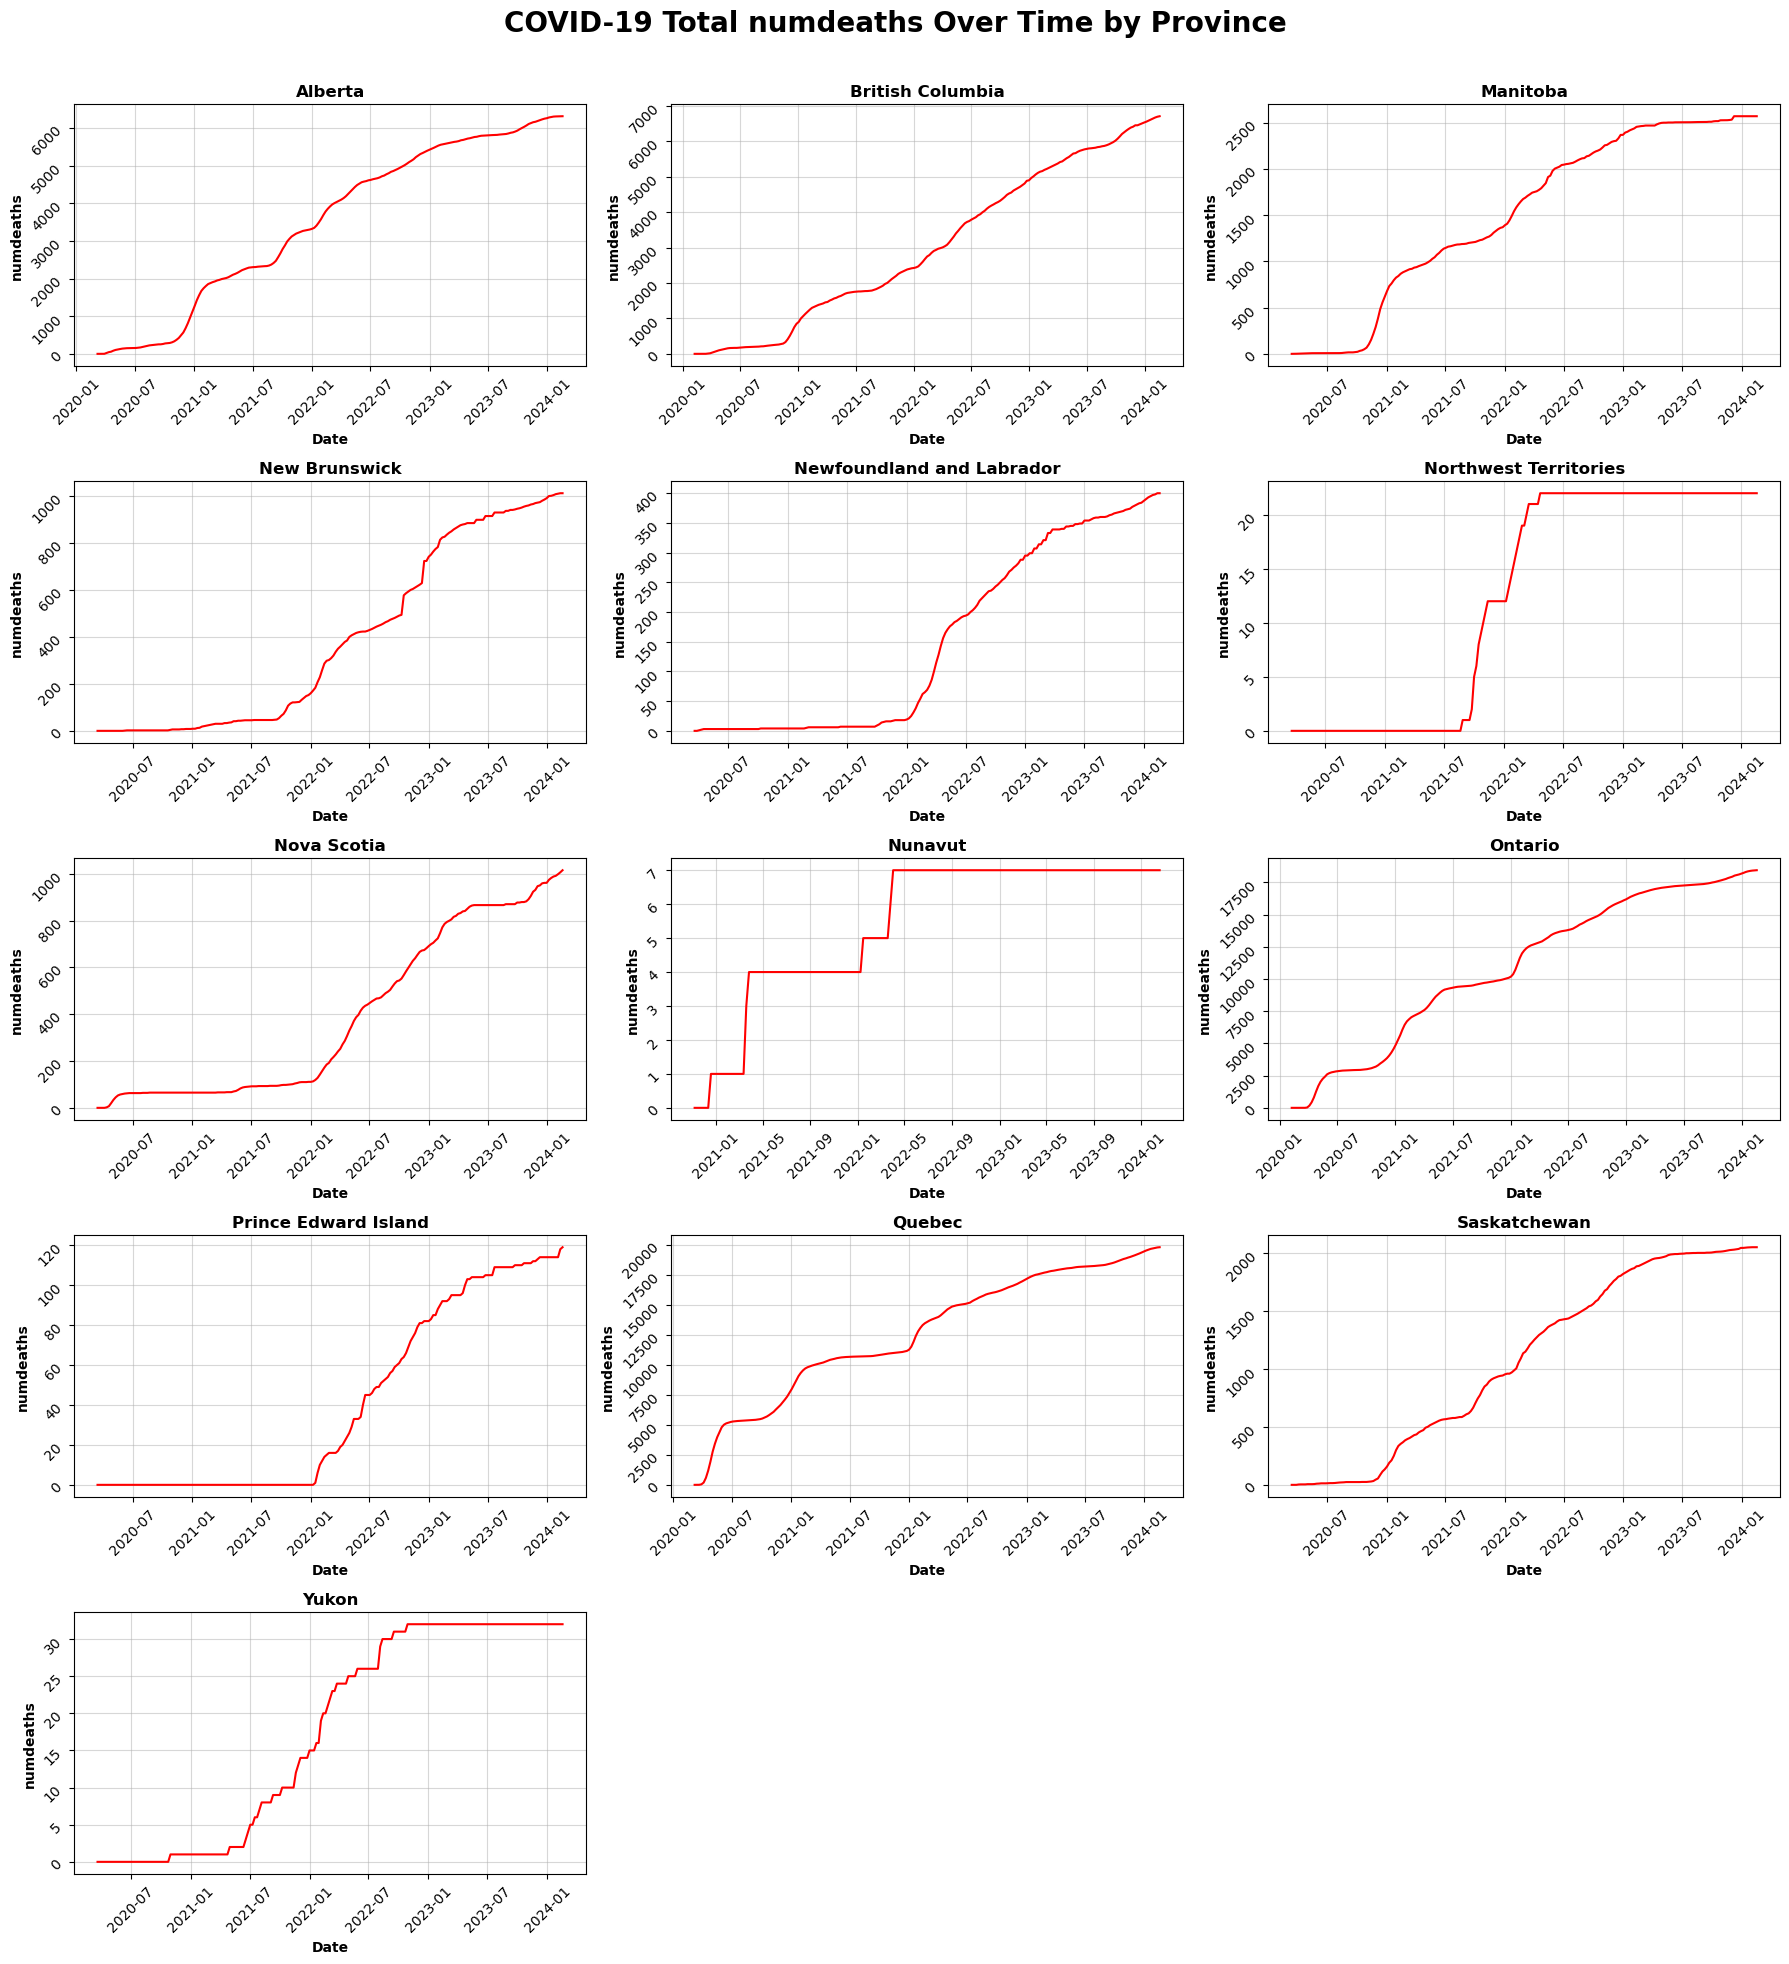

In [30]:
# Extract unique provinces from the dataset
provinces = grouped_data['province'].unique()

# Define the number of provinces and the grid dimensions
num_provinces = len(provinces)
grid_rows = (num_provinces // 3) + (num_provinces % 3 > 0)
grid_cols = 3

fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(18, grid_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot data for each province in its subplot
for i, province in enumerate(provinces):
    province_data = grouped_data[grouped_data['province'] == province]
    axes[i].plot(province_data['date'], province_data['numdeaths'], color='red')
    axes[i].set_title(province, fontsize=12, fontweight = 'bold')
    axes[i].set_xlabel('Date', fontsize=10, fontweight = 'bold')
    axes[i].set_ylabel('numdeaths', fontsize=10, fontweight = 'bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=45)
    axes[i].grid(alpha=0.5)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and move the main title above the grid
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title above the grid
fig.suptitle('COVID-19 Total numdeaths Over Time by Province', fontsize=20, y=0.98, fontweight = 'bold')

plt.show()

### 2.4 COVID-19 cumulative total Death over time by province

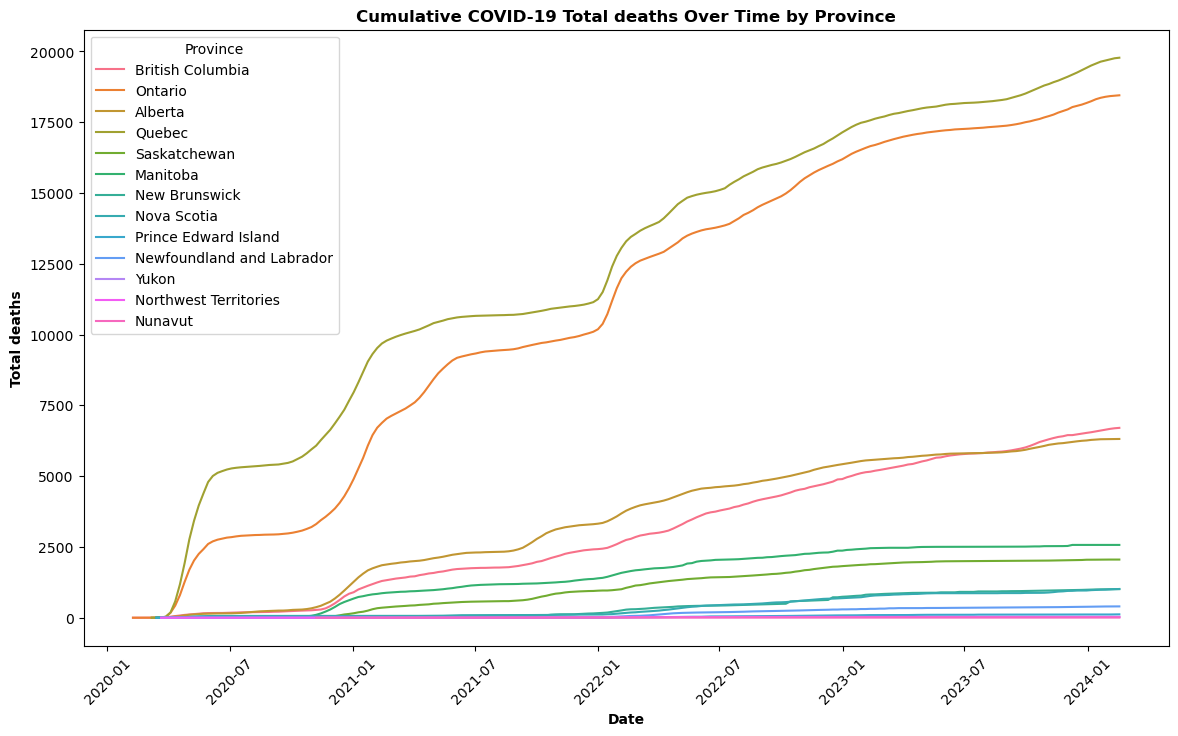

In [31]:
# Line plot for cumulative total cases over time by province
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_covid, x='date', y='numdeaths', hue='province')
plt.title("Cumulative COVID-19 Total deaths Over Time by Province", fontsize=12, fontweight='bold')
plt.xlabel("Date", fontweight='bold')
plt.ylabel("Total deaths", fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Province')
plt.show()

### 3. Comparative Analysis of Case and Death Rates
### 3.1 COVID-19 Cases Over Time by Province

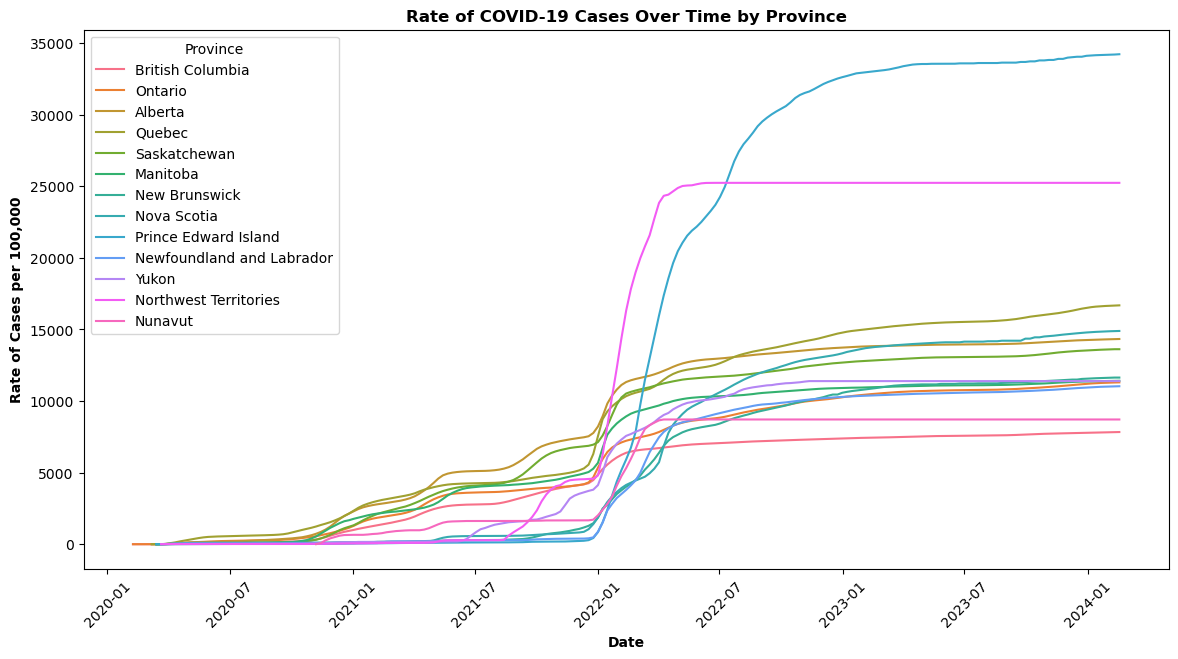

In [32]:
# Line plot for case rates per 100,000 people
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_covid, x='date', y='ratecases_total', hue='province')
plt.title("Rate of COVID-19 Cases Over Time by Province", fontweight = 'bold')
plt.xlabel("Date", fontweight = 'bold')
plt.ylabel("Rate of Cases per 100,000", fontweight = 'bold')
plt.xticks(rotation=45)
plt.legend(title='Province')
plt.show()

### 3.2 COVID-19 Deaths Over Time by Province

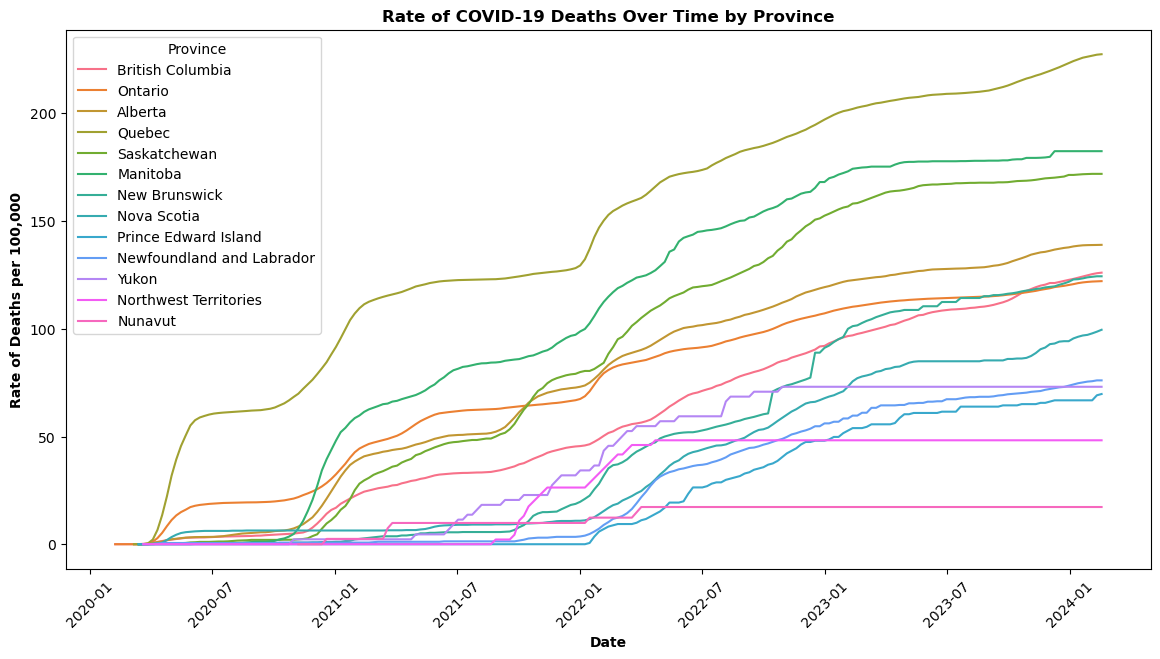

In [33]:
# Line plot for death rates per 100,000 people
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_covid, x='date', y='ratedeaths', hue='province')
plt.title("Rate of COVID-19 Deaths Over Time by Province", fontweight = 'bold')
plt.xlabel("Date", fontweight = 'bold')
plt.ylabel("Rate of Deaths per 100,000", fontweight = 'bold')
plt.xticks(rotation=45)
plt.legend(title='Province')
plt.show()

### 4. COVID-19 Weekly Reporting Trends 
### 4.1 Weekly New Cases by Province 

In [34]:
# Stacked Bar Chart for Weekly Reporting Trends
weekly_data = data_covid.groupby(['date', 'province']).agg({'weekly_new_cases': 'sum', 'weekly_new_deaths': 'sum'}).reset_index()
weekly_data

,date,province,weekly_new_cases,weekly_new_deaths
0,2020-02-08,British Columbia,4.0,0.0
1,2020-02-08,Ontario,4.0,0.0
2,2020-02-15,British Columbia,4.0,0.0
3,2020-02-15,Ontario,4.0,0.0
4,2020-02-22,British Columbia,6.0,0.0
...,...,...,...,...
2648,2024-02-17,Ontario,1696467.0,18428.0
2649,2024-02-17,Prince Edward Island,-104326.0,-1935.0
2650,2024-02-17,Quebec,1447260.0,19770.0
2651,2024-02-17,Saskatchewan,104362.0,1936.0


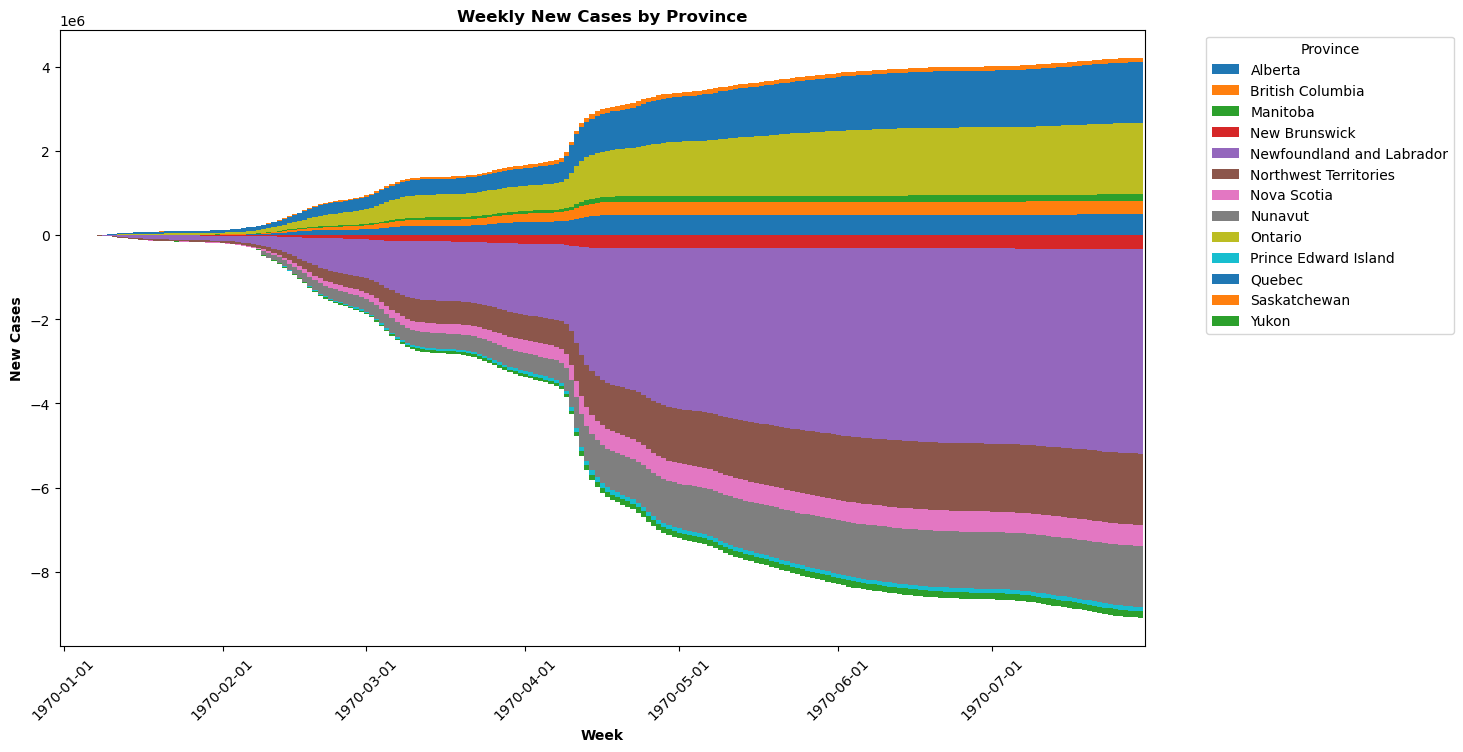

In [35]:
# Create the pivoted DataFrame for plotting
pivoted_weekly_data = weekly_data.pivot(index="date", columns="province", values="weekly_new_cases")

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
pivoted_weekly_data.plot(kind='bar', stacked=True, width=1, ax=ax)
plt.title("Weekly New Cases by Province", fontweight = 'bold')
plt.xlabel("Week", fontweight = 'bold')
plt.ylabel("New Cases", fontweight = 'bold')

# Format x-axis to show date without time
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 4.2 Weekly New Deaths by Province

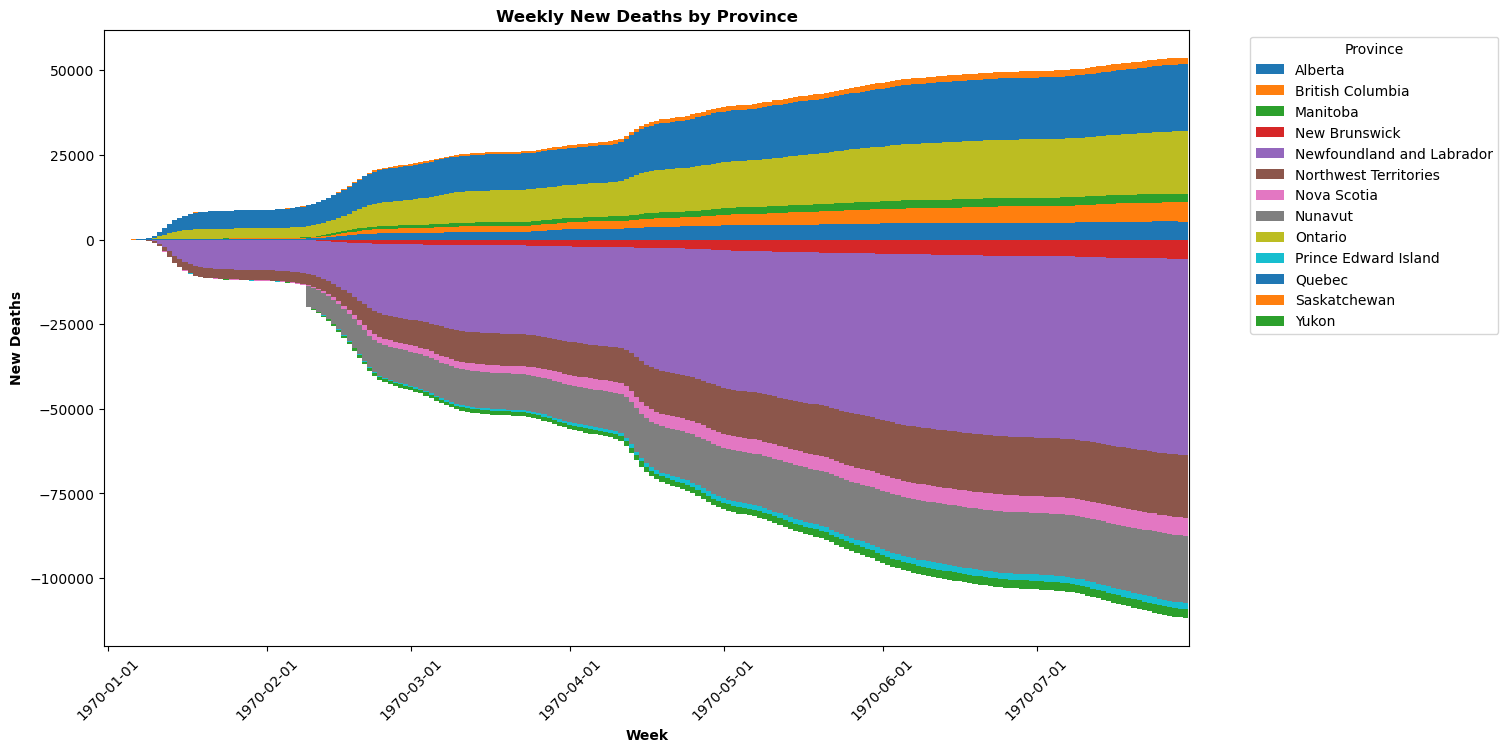

In [36]:
# Create the pivoted DataFrame for plotting
pivoted_weekly_data = weekly_data.pivot(index="date", columns="province", values="weekly_new_deaths")

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
pivoted_weekly_data.plot(kind='bar', stacked=True, width=1, ax=ax)
plt.title("Weekly New Deaths by Province", fontweight = 'bold')
plt.xlabel("Week", fontweight = 'bold')
plt.ylabel("New Deaths", fontweight = 'bold')

# Format x-axis to show date without time
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## IV. Conclusion

This analysis highlights the provincial disparities in **`COVID-19 cases`** and **`deaths`** in **`Canada`**. **Urbanized** and **densely** populated provinces, particularly **`Ontario`** and **`Quebec`**, bore the brunt of the pandemic, contributing to the majority of the cases. In contrast, **less populated** provinces managed to maintain relatively **low case** counts. This visualization underscores the importance of **regionalized public health strategies** to address varying pandemic impacts effectively.